In [1]:
import torch
from d2l import torch as d2l


def softmax(X):
    # X: features x numbers
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdim=True)
    return X_exp / partition


def cross_entropy(y_hat, y):
    # y_hat[list(range(len(y_hat))), y]: A trick to pick out terms efficiently.
    return -torch.log(y_hat[list(range(len(y_hat))), y]).mean()


class SoftmaxRegressionScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W = torch.normal(
            0, sigma, size=(num_inputs, num_outputs), requires_grad=True
        )
        self.b = torch.zeros(num_outputs, requires_grad=True)

    def parameters(self):
        return [self.W, self.b]


@d2l.add_to_class(SoftmaxRegressionScratch)
def forward(self, X):
    X = X.reshape((-1, self.W.shape[0]))
    return softmax(X @ self.W + self.b)


@d2l.add_to_class(SoftmaxRegressionScratch)
def loss(self, y_hat, y):
    return cross_entropy(y_hat, y)

In [2]:
data = d2l.FashionMNIST(batch_size=256)
model = SoftmaxRegressionScratch(num_inputs=784, num_outputs=10, lr=0.1)
trainer = d2l.Trainer(max_epochs=100)
trainer.fit(model, data)

Accuracy: 0.83


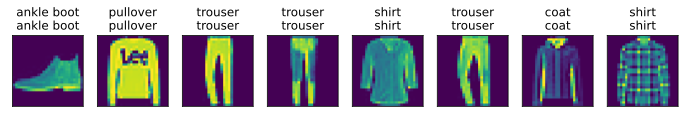

In [3]:
X, y = next(iter(data.val_dataloader()))
preds = model(X).argmax(axis=1)
# Show test result.
labels = [a + "\n" + b for a, b in zip(data.text_labels(y), data.text_labels(preds))]
data.visualize([X, y], labels=labels)
# Calculate accuracy
correct = preds.type(y.dtype) == y
print(f"Accuracy: {len(y[correct]) / float(len(y)):.2f}")